# Endometrial Cancer Survival Analysis - Exploratory Data Analysis

This notebook explores the endometrial cancer dataset to understand:
- Data structure and quality
- Feature distributions
- Missing values patterns
- Potential predictors for survival analysis


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

# Import our modules
import sys
sys.path.insert(0, '..')  # This should be '..' not the Excel file!
from src.data_loader import load_excel_data, get_data_summary

## 1. Load Data


In [2]:
# Load the dataset
DATA_PATH = Path('..') / 'IQ_Cancer_Endometrio_merged_NMSP.xlsx'
df = load_excel_data(DATA_PATH)

print(f"Dataset shape: {df.shape}")
print(f"Number of patients: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd2 in position 16: invalid continuation byte

In [ ]:
# Preview the data
df.head()


,codigo_participante,recidiva,recidiva_exitus,diferencia_dias_reci_exit,causa_muerte,f_diag,fecha_de_recidi,f_muerte,visita_control,Ultima_fecha,FN,f_1v,edad,imc,otra_histo,tipo_histologico,Grado,valor_de_ca125,ecotv_infiltsub,ecotv_infiltobj,metasta_distan,grupo_riesgo,despues_diag,estadiaje_pre_i,est_pcte,...,estudio_genetico_r03,estudio_genetico_r04,estudio_genetico_r05,estudio_genetico_r06,estadificacion_,tabla_de_estadi,FIGO2023,grupo_de_riesgo_definitivo,tabla_de_riesgo,Tributaria_a_Radioterapia,rdt,rt_dosis,n_doisis_rt,moti_no_RT,bqt,bt_realPac,ini_bqt_rt,final_bqt_rt,qt,Tratamiento_sistemico_realizad,inicio_qmt,fecha_final_qmt,otros_tt,tt_o_f_ini,tt_o_f_fin
0,4,0,0,626.0,NaN,2023-11-03,NaN,NaN,21/07/2025,2025-07-21,12/10/1955,03/11/2023,68.0,39.40,NaN,2,2,283.0,2.0,4.0,1.0,3.0,1,2.0,1,...,0.0,0.0,0.0,1.0,9.0,NaN,14.0,5.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,1.0,2.0,14/02/2024,04/04/2024,NaN,NaN,NaN
1,7,0,0,244.0,1.0,2019-10-24,NaN,08/04/2021,24/06/2020,2020-06-24,24/09/1926,11/04/2019,92.0,24.14,y escasos focos de endocarcinoma endometroide,1,1,NaN,4.0,3.0,0.0,1.0,0,NaN,2,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,0,0,1769.0,NaN,2020-07-16,NaN,NaN,20/05/2025,2025-05-20,26/11/1947,15/07/2020,72.0,38.80,NaN,2,1,NaN,4.0,3.0,0.0,1.0,1,0.0,1,...,0.0,0.0,0.0,1.0,1.0,NaN,1.0,1.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1,1,1003.0,NaN,2021-02-22,22/11/2023,NaN,27/10/2025,2023-11-22,15/10/1942,11/02/2021,78.0,36.30,NaN,2,1,NaN,3.0,3.0,0.0,2.0,1,1.0,1,...,0.0,0.0,0.0,1.0,7.0,NaN,11.0,5.0,NaN,1.0,2.0,2.0,25.0,NaN,1.0,1.0,08/10/2021,12/11/2021,1.0,2.0,06/05/2021,20/08/2021,NaN,NaN,NaN
4,10,0,0,1917.0,NaN,2019-11-15,NaN,NaN,13/02/2025,2025-02-13,06/07/1951,12/11/2019,68.0,31.10,NaN,2,1,NaN,3.0,NaN,0.0,1.0,1,0.0,1,...,0.0,0.0,0.0,1.0,1.0,NaN,1.0,1.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Column names
print("All columns:")
for i, col in enumerate(df.columns):
    print(f"{i+1:3d}. {col}")


All columns:
  1. codigo_participante
  2. recidiva
  3. recidiva_exitus
  4. diferencia_dias_reci_exit
  5. causa_muerte
  6. f_diag
  7. fecha_de_recidi
  8. f_muerte
  9. visita_control
 10. Ultima_fecha
 11. FN
 12. f_1v
 13. edad
 14. imc
 15. otra_histo
 16. tipo_histologico
 17. Grado
 18. valor_de_ca125
 19. ecotv_infiltsub
 20. ecotv_infiltobj
 21. metasta_distan
 22. grupo_riesgo
 23. despues_diag
 24. estadiaje_pre_i
 25. est_pcte
 26. libre_enferm
 27. comentarios
 28. numero_de_recid
 29. recid_super_1
 30. dx_recidiva
 31. num_recidiva
 32. loc_recidiva_r01
 33. loc_recidiva_r02
 34. loc_recidiva_r03
 35. loc_recidiva_r04
 36. loc_recidiva_r05
 37. loc_recidiva_r06
 38. tto_recidiva
 39. Tt_recidiva_qx
 40. otro_ttIQ_recid
 41. Reseccion_macroscopica_complet
 42. Tratamiento_RT
 43. Tratamiento_sistemico
 44. estado
 45. usuario_reg1
 46. hsp_trat_primario
 47. presntado_cTG
 48. centro_tratPrima
 49. tto_NA
 50. f_tto_NA
 51. ciclos_tto_NAdj
 52. tto_1_quirugico
 53. fec

## 2. Data Types and Basic Statistics


In [ ]:
# Data types summary
print("Data types:")
print(df.dtypes.value_counts())
print("\n")

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")


Data types:
float64           152
object             22
int64              13
datetime64[ns]      2
Name: count, dtype: int64


Numeric columns: 165
Categorical columns: 22


In [ ]:
# Basic statistics for numeric columns
df.describe().T


,count,mean,min,25%,50%,75%,max,std
codigo_participante,163.0,131.846626,4.0,71.0,123.0,199.5,273.0,76.825004
recidiva,163.0,0.288344,0.0,0.0,0.0,0.0,2.0,0.563542
recidiva_exitus,163.0,0.319018,0.0,0.0,0.0,1.0,2.0,0.574193
diferencia_dias_reci_exit,161.0,1075.689441,15.0,479.0,991.0,1707.0,2671.0,673.352751
causa_muerte,27.0,0.518519,0.0,0.0,1.0,1.0,1.0,0.509175
...,...,...,...,...,...,...,...,...
bt_realPac,38.0,0.894737,0.0,1.0,1.0,1.0,1.0,0.311012
qt,153.0,0.20915,0.0,0.0,0.0,0.0,1.0,0.408038
Tratamiento_sistemico_realizad,30.0,1.566667,0.0,1.25,2.0,2.0,2.0,0.773854
tt_o_f_ini,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Missing Values Analysis


In [ ]:
# Calculate missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing %', ascending=False)

# Show columns with missing values
missing_df[missing_df['Missing Count'] > 0]


,Missing Count,Missing %
tt_o_f_fin,163,100.00
tabla_de_riesgo,163,100.00
tiempo_transcur,163,100.00
tabla_de_estadi,163,100.00
otro_ttIQ_recid,163,100.00
...,...,...
estadiaje_pre_i,3,1.84
diferencia_dias_reci_exit,2,1.23
f_diag,2,1.23
grupo_riesgo,2,1.23


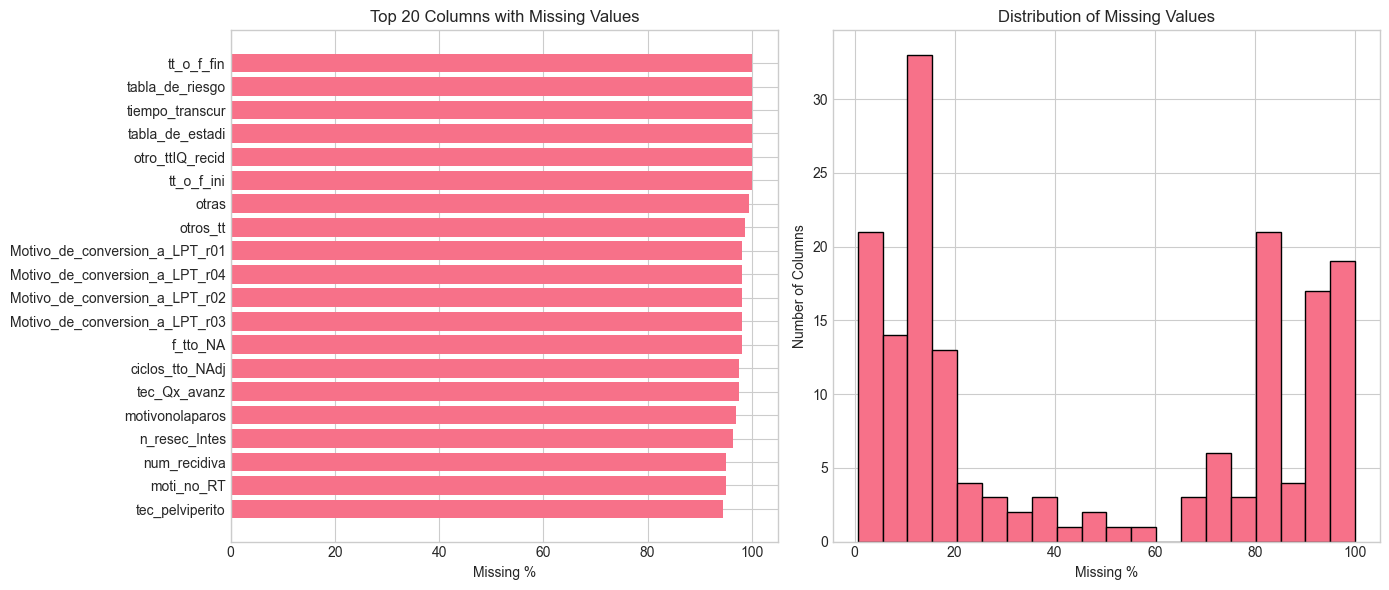

In [ ]:
# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Top 20 columns with most missing values
top_missing = missing_df[missing_df['Missing Count'] > 0].head(20)
if len(top_missing) > 0:
    axes[0].barh(top_missing.index, top_missing['Missing %'])
    axes[0].set_xlabel('Missing %')
    axes[0].set_title('Top 20 Columns with Missing Values')
    axes[0].invert_yaxis()

# Distribution of missing values
axes[1].hist(missing_pct[missing_pct > 0], bins=20, edgecolor='black')
axes[1].set_xlabel('Missing %')
axes[1].set_ylabel('Number of Columns')
axes[1].set_title('Distribution of Missing Values')

plt.tight_layout()
plt.show()


## 4. Target Variables (Outcomes)


In [ ]:
# Look for potential outcome/event columns
outcome_keywords = ['recidiva', 'death', 'survival', 'status', 'event', 'muerte', 'fallec', 'exitus']
time_keywords = ['time', 'tiempo', 'survival', 'follow', 'seguimiento', 'meses', 'dias']

print("Potential outcome columns:")
for col in df.columns:
    if any(kw in col.lower() for kw in outcome_keywords):
        print(f"  - {col}: {df[col].unique()[:10]}")

print("\nPotential time columns:")
for col in df.columns:
    if any(kw in col.lower() for kw in time_keywords):
        print(f"  - {col}: min={df[col].min()}, max={df[col].max()}, mean={df[col].mean():.2f}")


Potential outcome columns:
  - recidiva: [0 1 2]
  - recidiva_exitus: [0 1 2]
  - causa_muerte: [nan  1.  0.]
  - f_muerte: [nan '08/04/2021' '24/06/2024' '05/02/2022' '23/09/2019' '09/05/2021'
 '11/06/2024' '19/02/2024' '31/03/2020' '07/09/2022']
  - dx_recidiva: [nan  1.  0.]
  - num_recidiva: [nan  1.  2.]
  - loc_recidiva_r01: [ 0. nan  1.]
  - loc_recidiva_r02: [ 0. nan  1.]
  - loc_recidiva_r03: [ 0. nan  1.]
  - loc_recidiva_r04: [ 0. nan]
  - loc_recidiva_r05: [ 0. nan]
  - loc_recidiva_r06: [ 0. nan  1.]
  - tto_recidiva: [nan  1.  0.  2.]
  - Tt_recidiva_qx: [nan  0.  1.  2.]

Potential time columns:
  - diferencia_dias_reci_exit: min=15.0, max=2671.0, mean=1075.69
  - tiempo_qx: min=15.0, max=425.0, mean=165.34
  - tiempo_transcur: min=nan, max=nan, mean=nan
  - dias_de_ingreso: min=1.0, max=21.0, mean=2.96


Recidiva (Recurrence) distribution:
recidiva
0    125
1     29
2      9
Name: count, dtype: int64

Recurrence rate: 28.8%


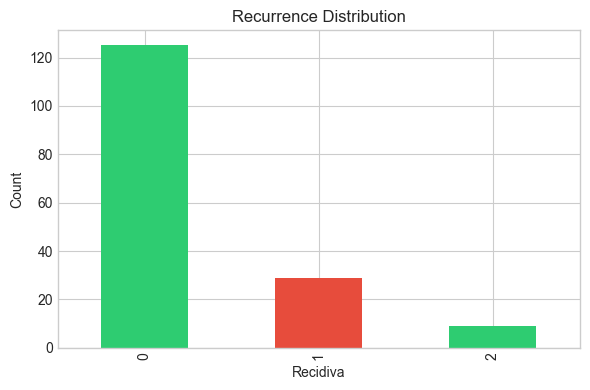

In [ ]:
# Analyze 'recidiva' (recurrence) if it exists
if 'recidiva' in df.columns:
    print("Recidiva (Recurrence) distribution:")
    print(df['recidiva'].value_counts(dropna=False))
    print(f"\nRecurrence rate: {df['recidiva'].mean()*100:.1f}%")
    
    fig, ax = plt.subplots(figsize=(6, 4))
    counts = df['recidiva'].value_counts()
    counts.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'][:len(counts)])
    ax.set_xlabel('Recidiva')
    ax.set_ylabel('Count')
    ax.set_title('Recurrence Distribution')
    plt.tight_layout()
    plt.show()


## 5. Feature Distributions


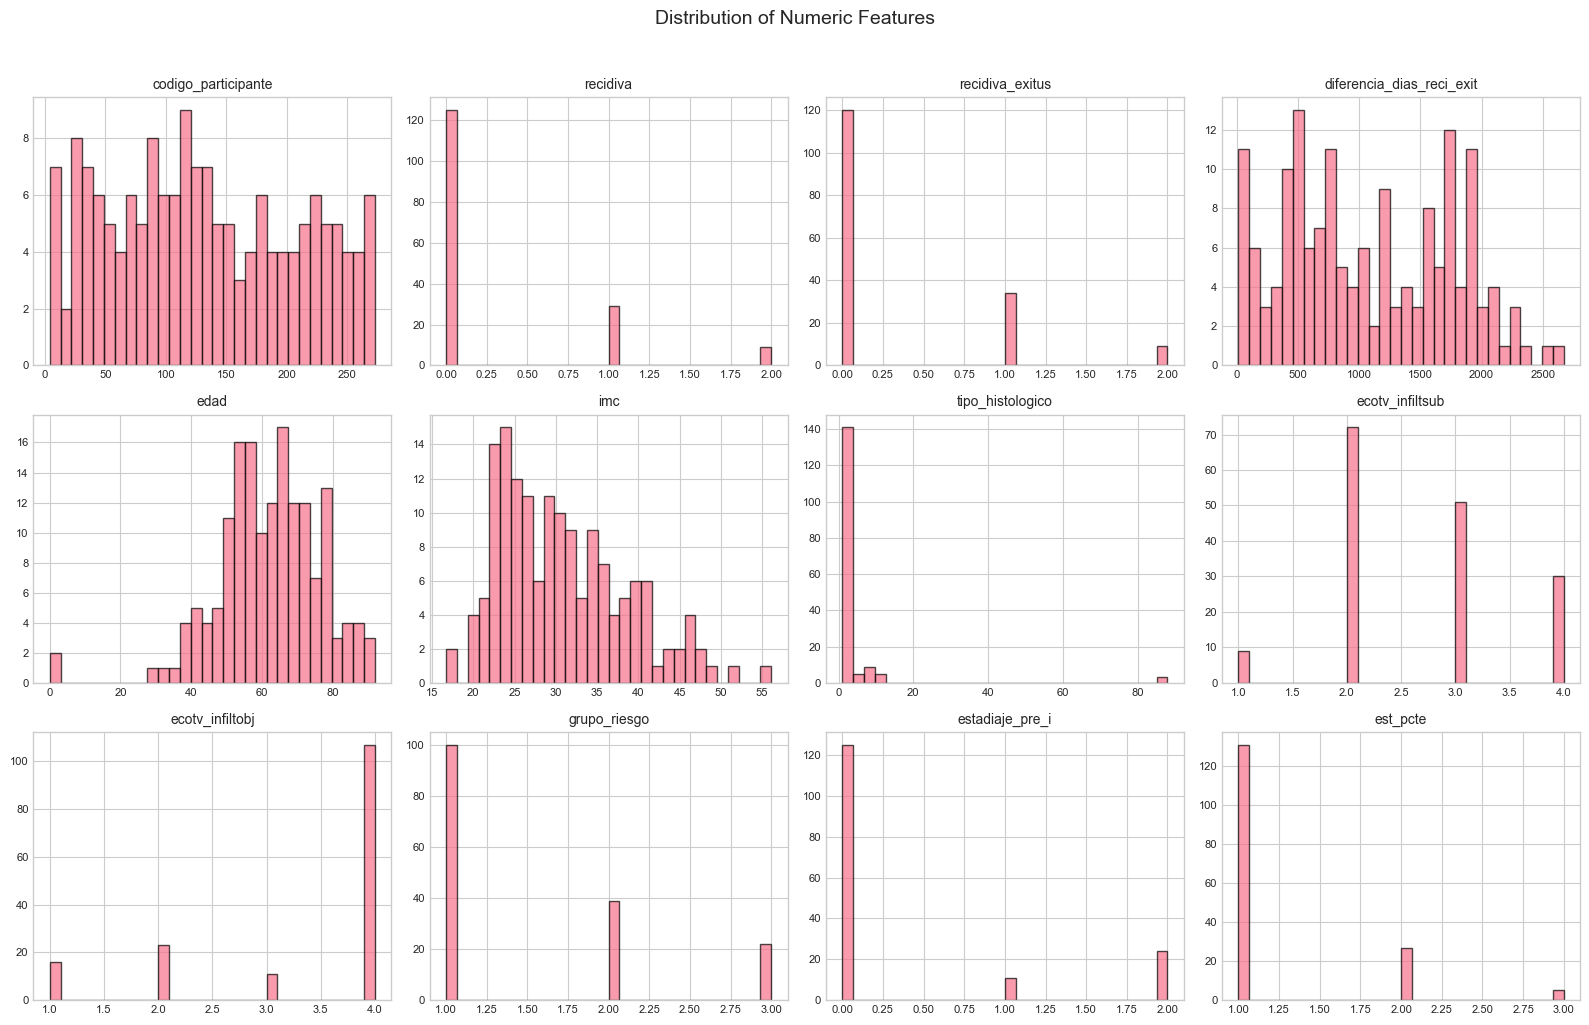

In [ ]:
# Select numeric columns with reasonable ranges for visualization
viz_cols = [col for col in numeric_cols if df[col].nunique() > 2 and df[col].notna().sum() > 50]

# Plot distributions of first 12 numeric features
n_plots = min(12, len(viz_cols))
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(viz_cols[:n_plots]):
    data = df[col].dropna()
    axes[i].hist(data, bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(col[:25], fontsize=10)
    axes[i].tick_params(labelsize=8)

# Hide empty subplots
for j in range(n_plots, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribution of Numeric Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


## 6. Correlation Analysis


In [ ]:
# Select columns with < 30% missing for correlation analysis
low_missing_cols = missing_df[missing_df['Missing %'] < 30].index.tolist()
corr_cols = [col for col in low_missing_cols if col in numeric_cols]

print(f"Analyzing correlations for {len(corr_cols)} columns with <30% missing")


Analyzing correlations for 99 columns with <30% missing


Top 20 features correlated with Recidiva:
recidiva                      1.000000
recidiva_exitus               0.953947
grupo_de_riesgo_definitivo    0.417910
grado_histologi               0.398792
afectacion_linf               0.383186
estadificacion_               0.380569
est_pcte                      0.366468
FIGO2023                      0.348022
grupo_riesgo                  0.340538
Grado                         0.335613
histo_defin                   0.326432
Perforacion_uterina           0.300192
infilt_estr_cervix            0.279070
tiempo_qx                     0.278055
AP_centinela_pelvico          0.272188
qt                            0.267141
conver_laparo                 0.263853
tec_Qx                        0.263792
inf_param_vag                 0.258360
Tributaria_a_Radioterapia     0.255363
dtype: float64


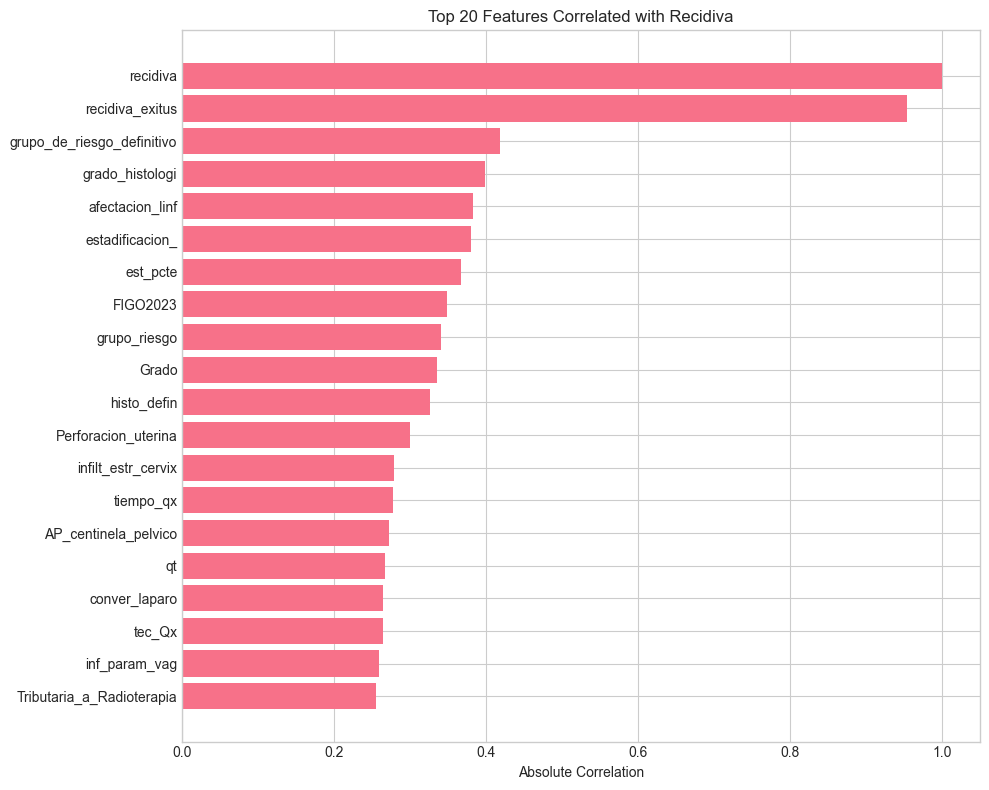

In [ ]:
# Correlation with recidiva (if exists)
if 'recidiva' in df.columns and len(corr_cols) > 0:
    correlations = df[corr_cols].corrwith(df['recidiva']).abs().sort_values(ascending=False)
    
    print("Top 20 features correlated with Recidiva:")
    print(correlations.head(20))
    
    # Plot top correlations
    fig, ax = plt.subplots(figsize=(10, 8))
    top_corr = correlations.head(20)
    ax.barh(range(len(top_corr)), top_corr.values)
    ax.set_yticks(range(len(top_corr)))
    ax.set_yticklabels(top_corr.index)
    ax.set_xlabel('Absolute Correlation')
    ax.set_title('Top 20 Features Correlated with Recidiva')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()


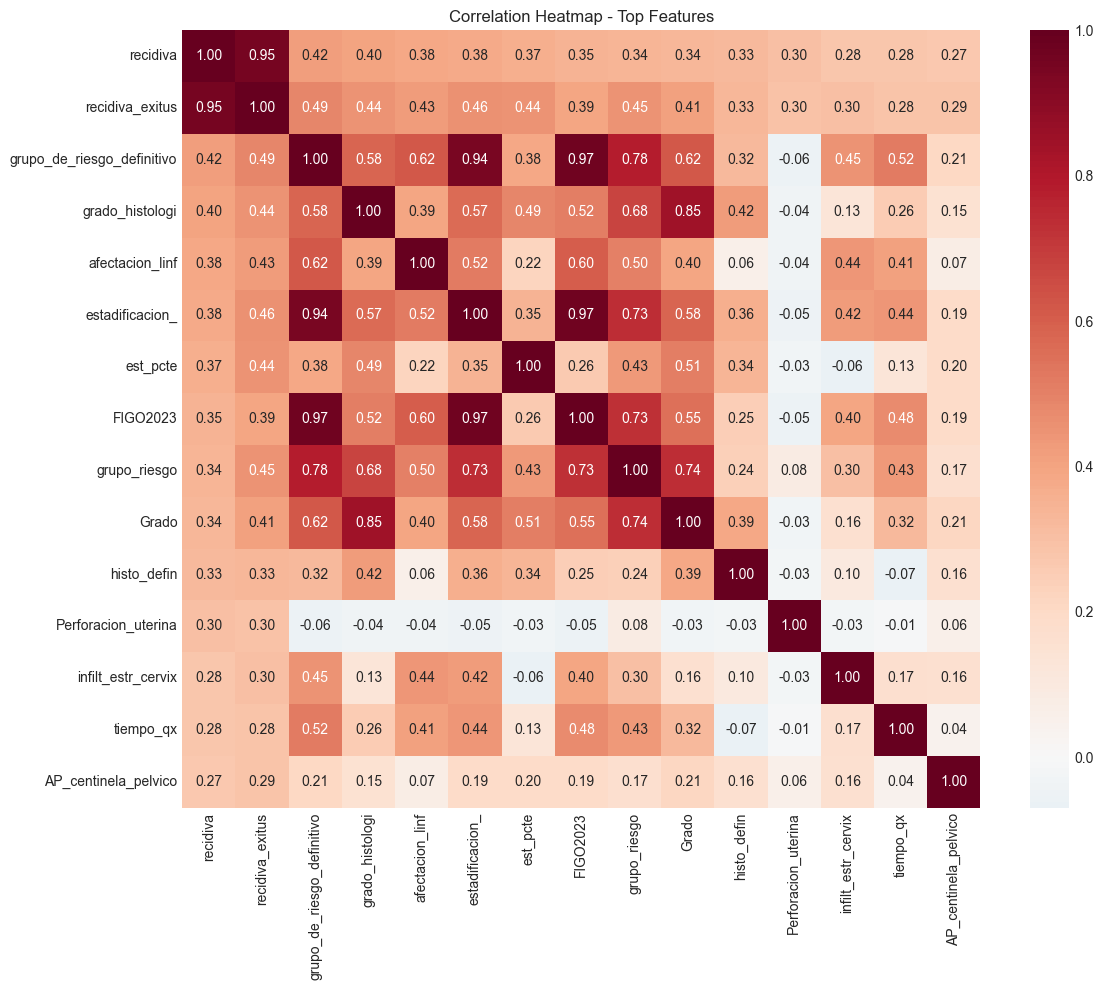

In [ ]:
# Correlation heatmap for top features
if 'recidiva' in df.columns and len(corr_cols) > 0:
    top_features = correlations.head(15).index.tolist()
    
    fig, ax = plt.subplots(figsize=(12, 10))
    corr_matrix = df[top_features].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0, ax=ax)
    ax.set_title('Correlation Heatmap - Top Features')
    plt.tight_layout()
    plt.show()


## 7. Summary and Recommendations


In [ ]:
# Generate summary
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"\nTotal patients: {len(df)}")
print(f"Total features: {len(df.columns)}")
print(f"  - Numeric: {len(numeric_cols)}")
print(f"  - Categorical: {len(categorical_cols)}")

print(f"\nMissing values:")
print(f"  - Columns with >50% missing: {len(missing_df[missing_df['Missing %'] > 50])}")
print(f"  - Columns with 0% missing: {len(missing_df[missing_df['Missing %'] == 0])}")

if 'recidiva' in df.columns:
    print(f"\nOutcome (Recidiva):")
    print(f"  - Recurrence rate: {df['recidiva'].mean()*100:.1f}%")
    print(f"  - Events: {int(df['recidiva'].sum())} / {len(df)}")

print("\n" + "="*60)



DATASET SUMMARY

Total patients: 163
Total features: 189
  - Numeric: 165
  - Categorical: 22

Missing values:
  - Columns with >50% missing: 75
  - Columns with 0% missing: 18

Outcome (Recidiva):
  - Recurrence rate: 28.8%
  - Events: 47 / 163

RECOMMENDATIONS

1. Consider removing columns with >50% missing values
2. Identify the survival time column for Cox PH analysis
3. Focus on features with highest correlation to outcome
4. Handle categorical variables with encoding
